Importing Libraries

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore
import matplotlib.pyplot as plt
import numpy as np

Reading dataset

In [28]:
train_dir = 'C:\\Users\\admin dell\\Desktop\\Completed projects\\Fish Freshness\\fresh and non-freh fish\\Training'
validation_dir = 'C:\\Users\\admin dell\\Desktop\\Completed projects\\Fish Freshness\\fresh and non-freh fish\\Testing'

import os

print("Training directory exists:", os.path.isdir(train_dir))
print("Validation directory exists:", os.path.isdir(validation_dir))




Training directory exists: True
Validation directory exists: True


In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary'
)

print("Train generator classes:", train_generator.class_indices)
print("Validation generator classes:", validation_generator.class_indices)




Found 40 images belonging to 2 classes.


Found 20 images belonging to 2 classes.
Train generator classes: {'fresh': 0, 'non-fresh': 1}
Validation generator classes: {'fresh': 0, 'non-fresh': 1}


CNN Model Building

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

c:\Users\admin dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


c:\Users\admin dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.5300 - loss: 2.0139 - val_accuracy: 0.5000 - val_loss: 1.2288
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.4500 - loss: 1.0121 - val_accuracy: 0.9000 - val_loss: 0.5590
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.8267 - loss: 0.5539 - val_accuracy: 0.5500 - val_loss: 0.4974
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.7200 - loss: 0.4988 - val_accuracy: 1.0000 - val_loss: 0.3500
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 1.0000 - loss: 0.3174 - val_accuracy: 1.0000 - val_loss: 0.2389


In [31]:
model.save('Fish_eye.h5')

Model Testing

In [32]:
def testing_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/255
    op= ['fresh','non fresh']

    predictions = model.predict(img_array)
    prediction_class = (predictions>0.5).astype('int8')
    prediction_class_index = int(prediction_class[0][0])
    prediction_labels = op[prediction_class_index]

    plt.imshow(img)
    plt.title(f"prediction: {prediction_labels}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


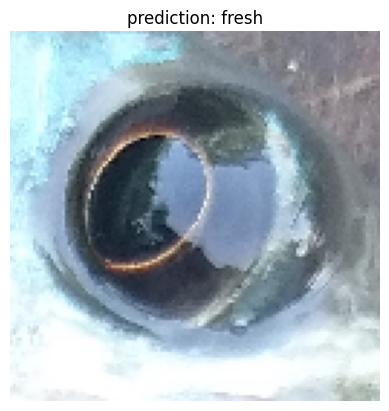

In [33]:
test1 = 'C:\\Users\\admin dell\\Desktop\\Completed projects\\Fish Freshness\\fresh and non-freh fish\\Testing\\fresh\\20200517_084637.jpg'
testing_image(test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


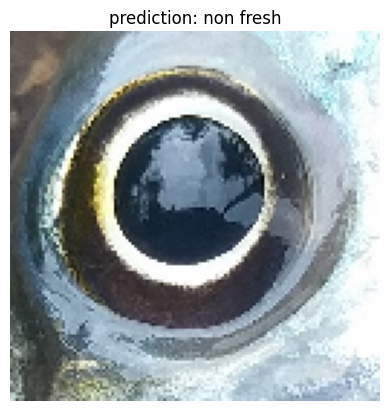

In [34]:
test2 = 'C:\\Users\\admin dell\\Desktop\\Completed projects\\Fish Freshness\\fresh and non-freh fish\\Testing\\non-fresh\\20200517_145805.jpg'
testing_image(test2)

Random Image from internet

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


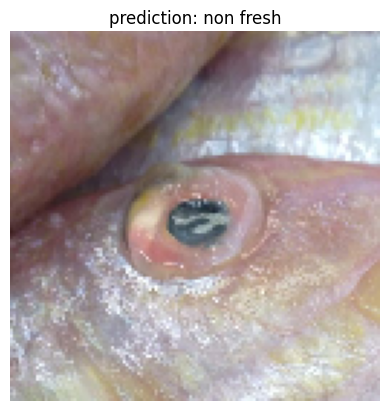

In [35]:
test3 = 'C:\\Users\\admin dell\\Desktop\\nonfresh.jpg'
testing_image(test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


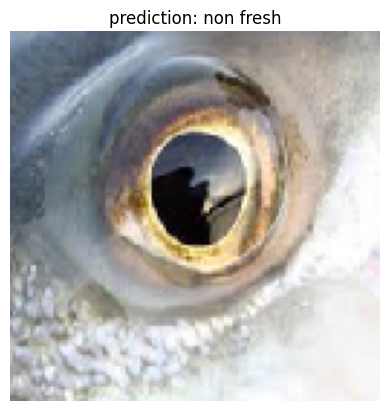

In [36]:
test4 = r'C:\Users\admin dell\Desktop\fisheye.png'
testing_image(test4)